## Setting up the data

### Importing the Libraries

In [1]:
import os
import pandas as pd
import plotly
import plotly.express as px

### Importing the Dataset

In [2]:
csv_filepath = os.path.join(os.path.dirname(os.path.abspath('')), "data", "football_players_wage_data.csv")
football_wage_data = pd.read_csv(csv_filepath)
football_wage_data = football_wage_data.iloc[:, ::-1]
football_wage_data.head()

Caps  Apps    Position Nation             League       Club  Age  \
0    57   190     Forward    FRA  Ligue 1 Uber Eats        PSG   23   
1   119   324   Midfilder    BRA  Ligue 1 Uber Eats        PSG   30   
2   162   585     Forward    ARG  Ligue 1 Uber Eats        PSG   35   
3   120   443     Forward    BEL            La Liga  R. Madrid   31   
4    45   480  Goalkeeper    ESP     Premier League    Man UFC   31   

         Wage  
0  46,427,000  
1  42,125,000  
2  34,821,000  
3  19,959,000  
4  19,500,000

## Exploring the dataset properties

### Checking Missing Values

In [3]:
football_wage_data.isna().sum()

Caps        0
Apps        0
Position    0
Nation      0
League      0
Club        0
Age         0
Wage        0
dtype: int64

### Checking and removing the duplicates

In [4]:
football_wage_data.duplicated().sum()

65

In [5]:
football_wage_data[football_wage_data.duplicated()]

Caps  Apps   Position Nation             League       Club  Age     Wage
1488     0     0  Midfilder    ENG     Premier League    Chelsea   18  780,000
2372     0     0   Defender    ENG     Premier League    Chelsea   18  182,000
2433     0     2  Midfilder    CMR  Ligue 1 Uber Eats       LOSC   18  163,000
2476     0     0  Midfilder    ENG     Premier League   Man City   18  156,000
2584     0     0    Forward    ENG     Premier League  Liverpool   18  130,000
...    ...   ...        ...    ...                ...        ...  ...      ...
3868     0     0  Midfilder    ESP            La Liga  A. Madrid   18   13,000
3869     0     0   Defender    ESP            La Liga  A. Madrid   18   13,000
3875     0     0   Defender    ESP            La Liga    Sevilla   18   13,000
3878     0     0   Defender    ESP            La Liga   Valencia   18   13,000
3879     0     0   Defender    ESP            La Liga  A. Bilbao   18   13,000

[65 rows x 8 columns]

In [6]:
football_wage_data = football_wage_data.drop_duplicates()

In [7]:
football_wage_data[football_wage_data.duplicated()]

Empty DataFrame
Columns: [Caps, Apps, Position, Nation, League, Club, Age, Wage]
Index: []

### Dataset descriptions

In [8]:
football_wage_data.head()

Caps  Apps    Position Nation             League       Club  Age  \
0    57   190     Forward    FRA  Ligue 1 Uber Eats        PSG   23   
1   119   324   Midfilder    BRA  Ligue 1 Uber Eats        PSG   30   
2   162   585     Forward    ARG  Ligue 1 Uber Eats        PSG   35   
3   120   443     Forward    BEL            La Liga  R. Madrid   31   
4    45   480  Goalkeeper    ESP     Premier League    Man UFC   31   

         Wage  
0  46,427,000  
1  42,125,000  
2  34,821,000  
3  19,959,000  
4  19,500,000

In [9]:
football_wage_data['Wage'] = football_wage_data['Wage'].replace({',': ''}, regex=True).astype(int)

In [10]:
football_wage_data.shape

(3842, 8)

In [11]:
football_wage_data.columns

Index(['Caps', 'Apps', 'Position', 'Nation', 'League', 'Club', 'Age', 'Wage'], dtype='object')

In [12]:
football_wage_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Caps      3842 non-null   int64 
 1   Apps      3842 non-null   int64 
 2   Position  3842 non-null   object
 3   Nation    3842 non-null   object
 4   League    3842 non-null   object
 5   Club      3842 non-null   object
 6   Age       3842 non-null   int64 
 7   Wage      3842 non-null   int32 
dtypes: int32(1), int64(3), object(4)
memory usage: 255.1+ KB


In [13]:
football_wage_data.describe()

Caps         Apps          Age          Wage
count  3842.000000  3842.000000  3842.000000  3.842000e+03
mean      9.077564   142.426080    24.221499  1.390327e+06
std      20.657954   131.527544     4.914963  2.605882e+06
min       0.000000     0.000000    18.000000  1.400000e+03
25%       0.000000    19.000000    20.000000  7.800000e+04
50%       0.000000   119.000000    24.000000  4.160000e+05
75%       7.000000   226.000000    28.000000  1.569500e+06
max     180.000000   715.000000    41.000000  4.642700e+07

### Unique values of Categorical columns

In [14]:
football_wage_data["Position"].unique()

array(['Forward', 'Midfilder', 'Goalkeeper', 'Defender'], dtype=object)

In [15]:
football_wage_data["Nation"].unique()

array(['FRA', 'BRA', 'ARG', 'BEL', 'ESP', 'AUT', 'EGY', 'ENG', 'NOR',
       'GER', 'SVN', 'SEN', 'POL', 'CRO', 'NED', 'POR', 'ITA', 'SRB',
       'ALG', 'CIV', 'DEN', 'CRC', 'KOR', 'GHA', 'URU', 'MAR', 'GAB',
       'SWE', 'SCO', 'COL', 'TUR', 'BIH', 'UKR', 'USA', 'CMR', 'CAN',
       'GUI', 'WAL', 'MLI', 'SUI', 'CTA', 'DOM', 'NIR', 'MEX', 'NGA',
       'VEN', 'CZE', 'SVK', 'JAM', 'CHI', 'ARM', 'NZL', 'ZAM', 'JPN',
       'RUS', 'PAR', 'ALB', 'IRL', 'MNE', 'KOS', 'FIN', 'GRE', 'AUS',
       'BFA', 'ECU', 'ISR', 'HUN', 'IRN', 'COD', 'TOG', 'ROU', 'UZB',
       'MKD', 'GNB', 'MOZ', 'GRN', 'GEO', 'ZIM', 'TUN', 'SUR', 'LUX',
       'GAM', 'EQG', 'HON', 'MSR', 'BUL', 'ANG', 'RSA', 'BDI', 'CPV',
       'CYP', 'PER', 'SLE', 'GLP', 'BEN', 'PHI', 'GUF', 'LBY', 'COM',
       'CGO', 'ISL', 'MAD', 'LTU', 'PAN', 'LVA', 'CUW', 'EST', 'IRQ',
       'GUY', 'PLE', 'THA', 'CHN', 'BER', 'SIN'], dtype=object)

In [16]:
football_wage_data["League"].unique()

array(['Ligue 1 Uber Eats', 'La Liga', 'Premier League', 'Serie A',
       'Bundesliga', 'Primiera Liga'], dtype=object)

## Graph Plotting and Analysis

### Ploting top Countries with most number of Football players

#### grouping players nation along with their position

In [17]:
nation_wise_players_with_their_position_df = football_wage_data.groupby(
    ["Nation", "Position"]
).size().reset_index(name='positional_player_count').sort_values(by="positional_player_count", ascending=False)

nation_wise_players_with_their_position_df.head()

Nation   Position  positional_player_count
108    ESP   Defender                      170
245    POR   Defender                      162
102    ENG   Defender                      154
111    ESP  Midfilder                      140
119    FRA   Defender                      133

In [18]:
nation_wise_players_df = nation_wise_players_with_their_position_df.groupby(["Nation"])["positional_player_count"].sum().reset_index(
    name="Number of players"
).sort_values(by="Number of players", ascending=False)

nation_wise_players_df = nation_wise_players_df.head(10)
nation_wise_players_df.head()

Nation  Number of players
37    ESP                431
88    POR                419
35    ENG                396
40    FRA                351
44    GER                283

#### merging the nation_wise_players_df with nation_wise_players_with_their_position_df to get positional count

In [19]:
merged_df = nation_wise_players_df.merge(nation_wise_players_with_their_position_df, on="Nation")
merged_df.head()

Nation  Number of players    Position  positional_player_count
0    ESP                431    Defender                      170
1    ESP                431   Midfilder                      140
2    ESP                431     Forward                       75
3    ESP                431  Goalkeeper                       46
4    POR                419    Defender                      162

#### plotting bar chart of Top countries with most players

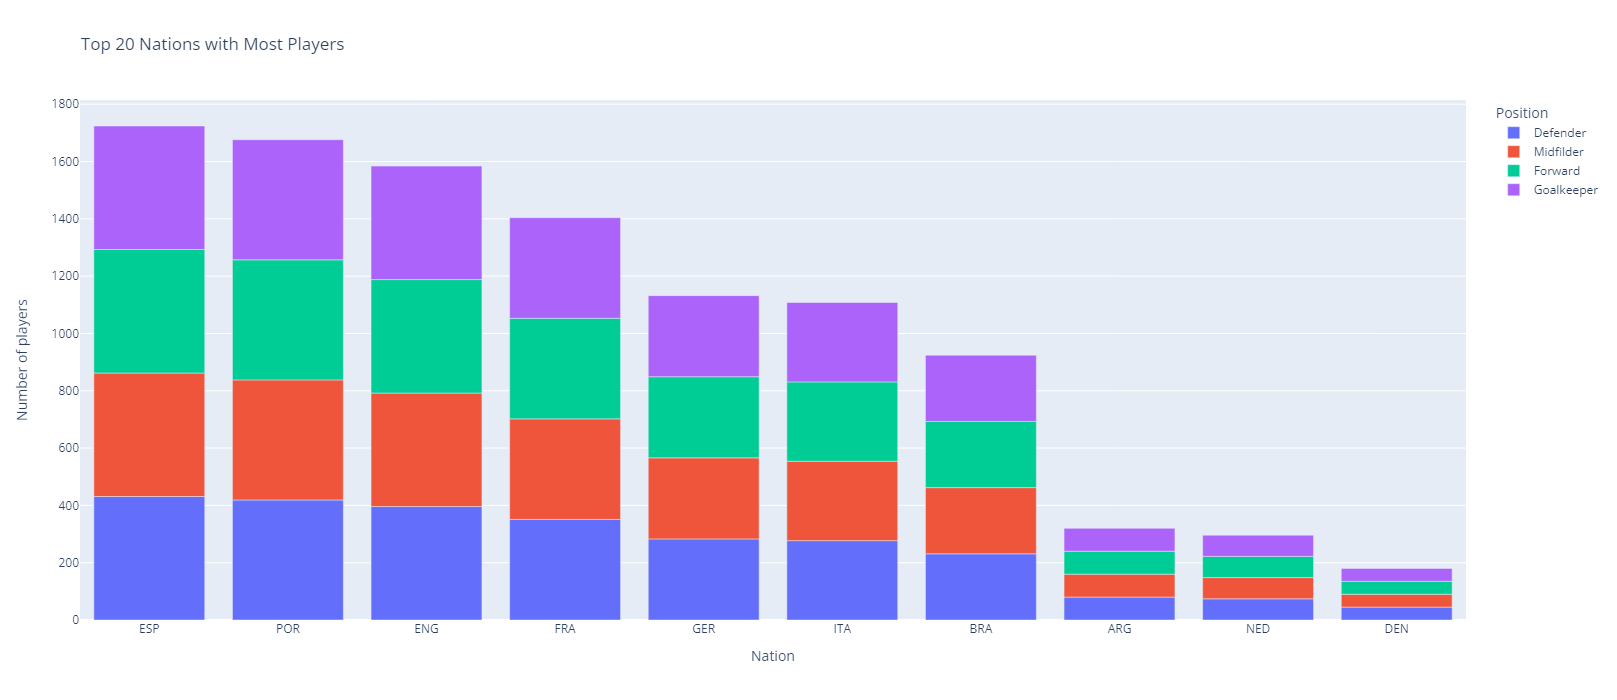

In [20]:
fig = px.bar(merged_df, x="Nation", y="Number of players", color="Position", title="Top 20 Nations with Most Players", height=700)
fig.show()

#### insights

1. **Homogeneous Representation:** 

A clear trend emerges from the depicted graph, highlighting that the top 6 countries with the highest number of players align with the nations where the respective top 6 leagues are based. This pattern suggests a significant prevalence of domestic players within each league, indicating a strong inclination for clubs to draw talent from their own national pool. Notably, the dominance of European nations among these top countries underscores the unparalleled popularity of football across the continent.


2. **Global Influencers Beyond Europe:** 

While the majority hails from European nations, the inclusion of Brazil and Argentina in the subsequent positions is noteworthy. These South American powerhouses hold the seventh and eighth positions, respectively, showcasing their substantial contribution to the global football landscape. The presence of Brazil and Argentina in the top ranks underscores the immense football fervor in South America, where these nations boast extensive fan bases and a rich footballing tradition. This global diversity in player origin adds a dynamic and international dimension to the composition of players in the top football leagues.

### Plotting the Piecharts showing the Distribution of players from different countries in a league

#### grouping the players of different leagues along with their nation

In [21]:
nation_wise_grouped_df = football_wage_data.groupby(["League", "Nation"]).size().reset_index(name='Count')
nation_wise_grouped_df.head()

League Nation  Count
0  Bundesliga    ALB      1
1  Bundesliga    ALG      1
2  Bundesliga    ANG      1
3  Bundesliga    ARG      3
4  Bundesliga    ARM      1

#### function to plot the pie chart

In [22]:
def plot_countries_with_most_players_in_given_league(league_name: str) -> plotly.graph_objs._figure.Figure:
    league_df = nation_wise_grouped_df[nation_wise_grouped_df['League'] == league_name].sort_values(by="Count", ascending=False)
    
    top_nations = 12
    top_countries_df = league_df.iloc[:top_nations, :]
    other_countries_count = league_df.iloc[top_nations:, :]['Count'].sum()
    other_countries_df = pd.DataFrame({"League": [league_name], "Nation": ["Other Countries"], "Count": [other_countries_count]})
    
    final_df = pd.concat([top_countries_df, other_countries_df])
    fig = px.pie(final_df, values='Count', names='Nation', title=f"Distribution of Players from Different Nations in {league_name}")
    return fig

#### plotting the piechart showing the distribution of players

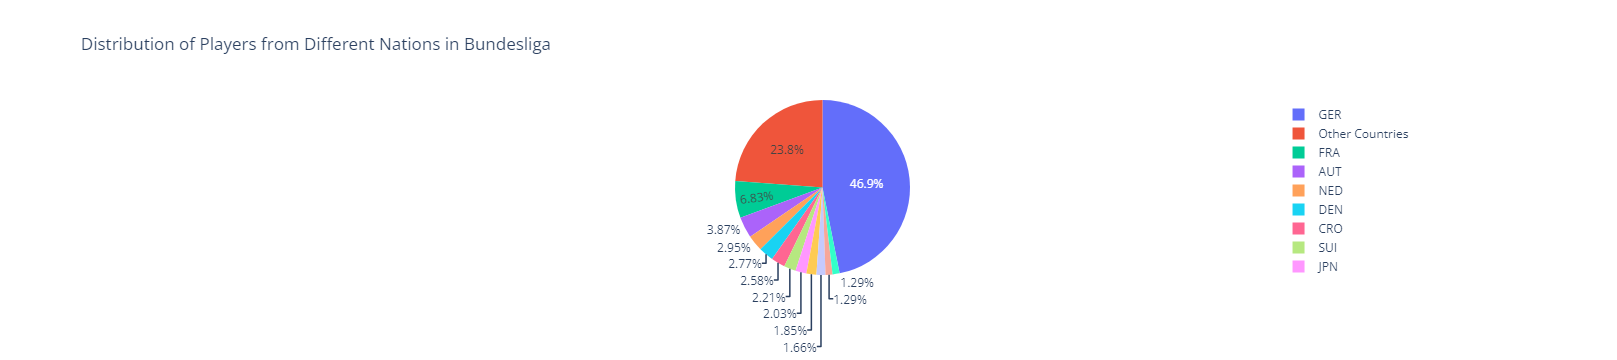

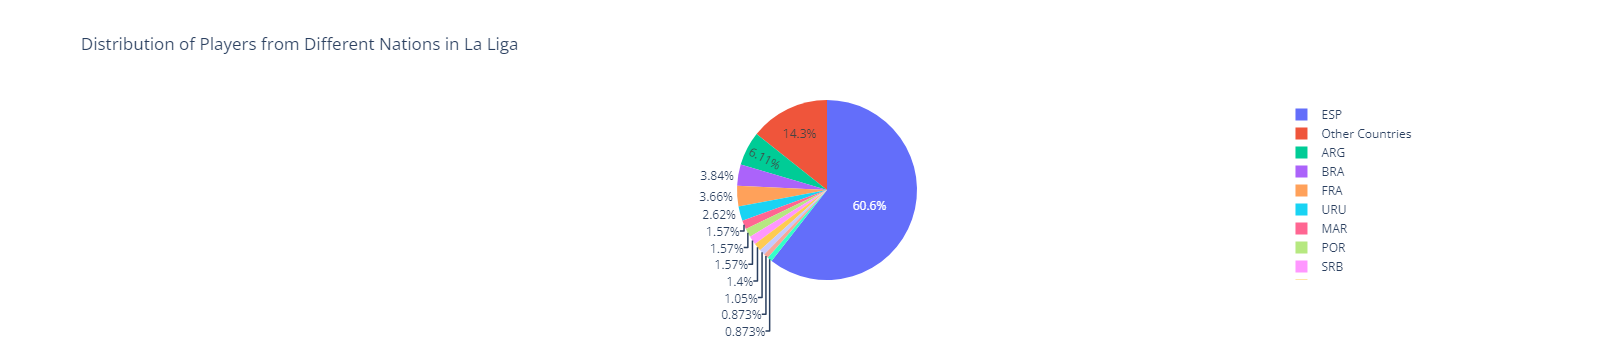

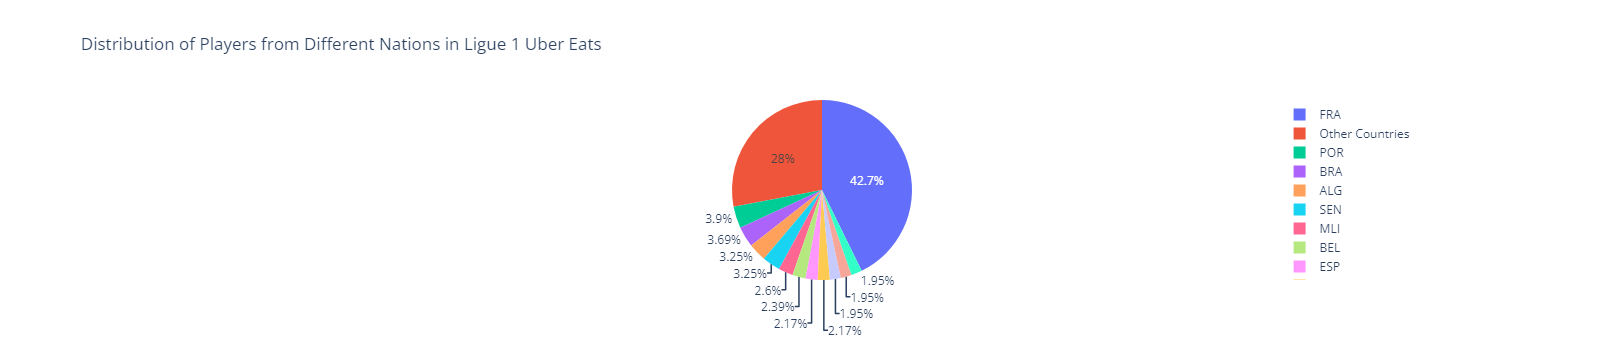

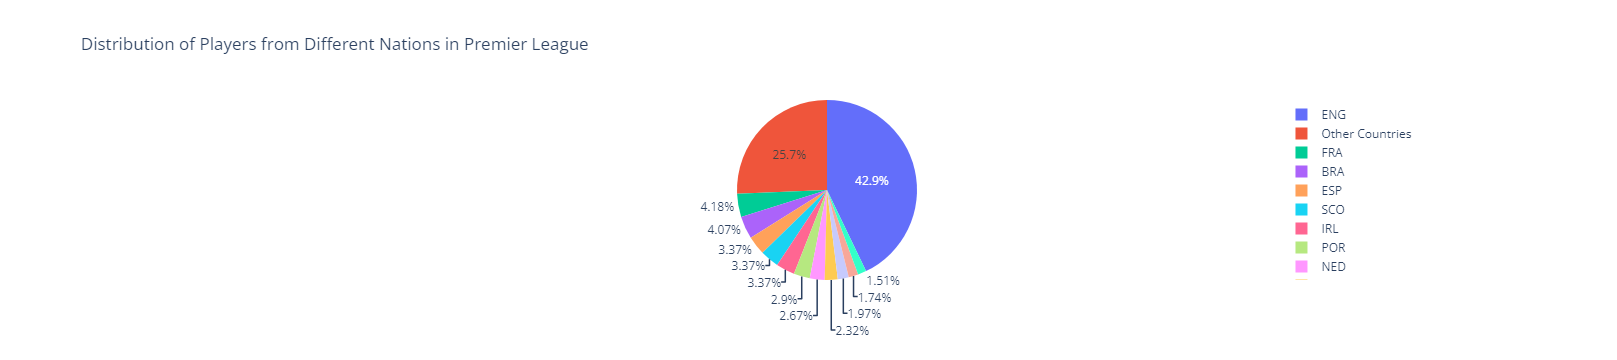

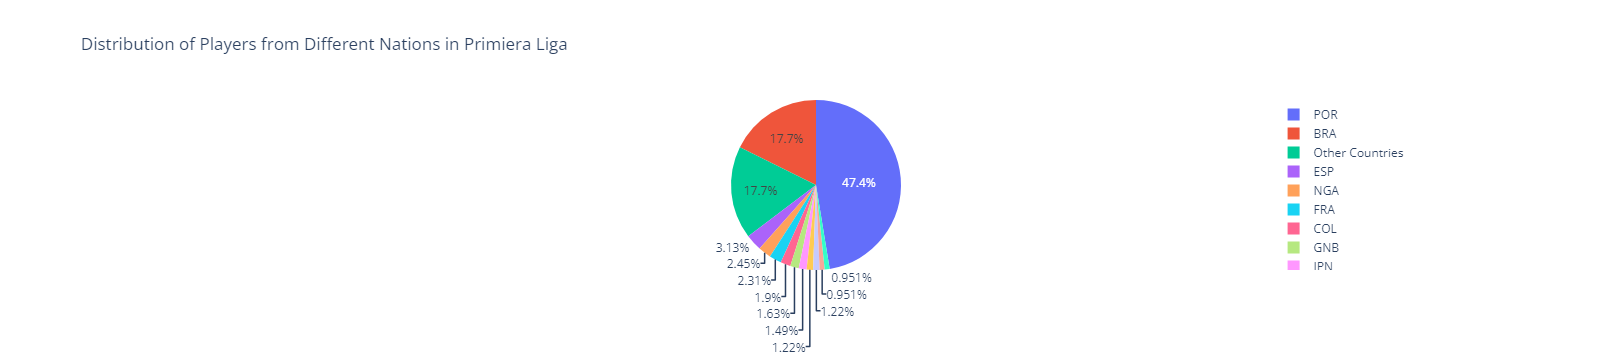

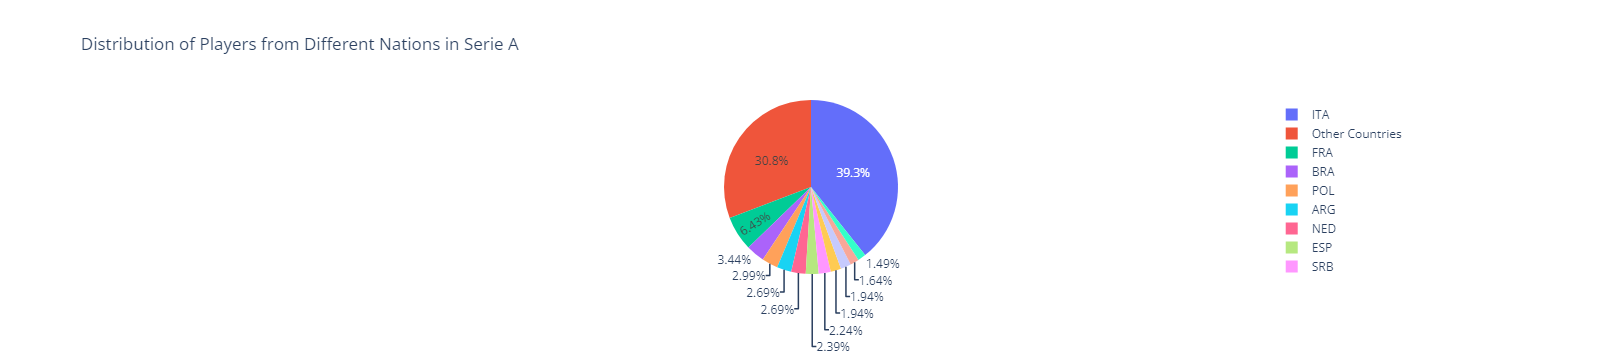

In [23]:
for league_name in nation_wise_grouped_df["League"].unique():
    fig = plot_countries_with_most_players_in_given_league(league_name)
    fig.show()
    # display_plotly_chart_image(f"distribution_of_players_in_{league_name}")
    print('\n' * 2)

### Plotting the Piechart showing the percentage of distribution of players in each position

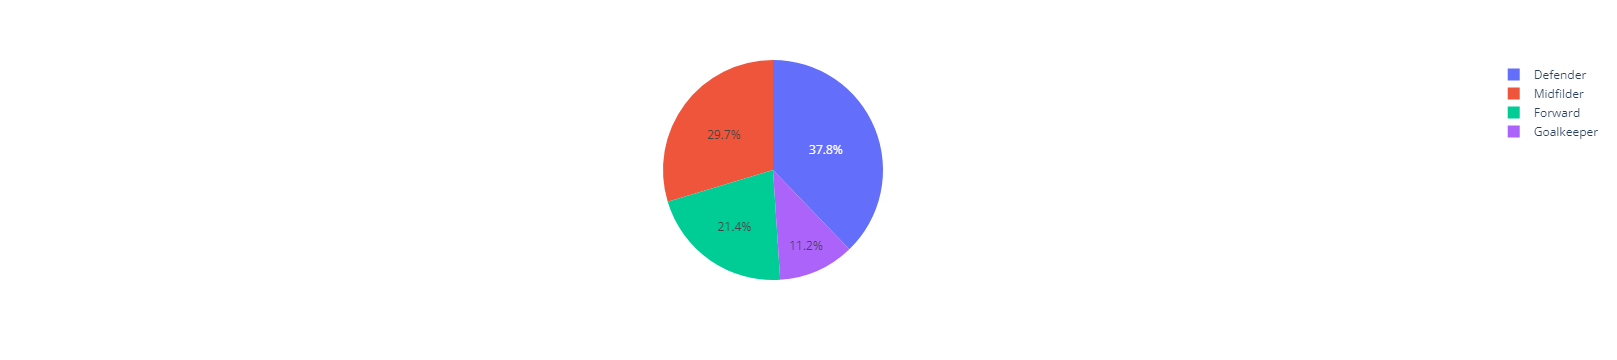

In [24]:
fig = px.pie(football_wage_data, names='Position')
fig.show()

#### Positional Analysis from Pie Chart for Distribution of Players


1. **Defensive Dominance (40%):** 

The preeminence of Defenders, constituting nearly 40% of players, underscores the strategic emphasis teams place on a solid defense. Teams often allocate a significant portion of their starting lineup to defensive positions, with a common practice of fielding four defenders out of the eleven players. The rationale behind this preference lies in the critical role defenders play in preventing goals. The physical demands on defenders, involving strenuous tasks such as tackling, sliding, and pushing, contribute to their higher representation. Additionally, the propensity for fatigue and injury in defensive roles encourages teams to bolster their defensive ranks, ensuring resilience throughout the match.


2. **Midfield Mastery (30%):** 

The combined contribution of Midfielders, comprising around 30%, highlights their pivotal role as the gears and engines of the game. Unlike Forwards, Midfielders often outnumber them, reflecting their integral position in controlling the game's tempo. With responsibilities spanning both offensive and defensive aspects, teams frequently opt for three to four midfielders in their lineup. The endurance required for midfield play, involving extensive running and playmaking responsibilities, contributes to their substantial representation on the field.


3. **Forward Finesse (20%):** 

Forwards, encapsulating approximately 20% of players, play a critical role in offensive strategies. Their representation, while lower than defenders and midfielders, aligns with the understanding that scoring goals is fundamental to success. Teams typically field a combination of skillful forwards to capitalize on goal-scoring opportunities. The lower numerical presence also reflects the specialized nature of forward positions, where precision and finesse often supersede numerical superiority.


4. **Goalkeeper Rarity (10%):** 

Goalkeepers constitute a modest 10% of the total players, mirroring the practical constraints of having only one goalkeeper in a starting lineup. The reduced physical load on goalkeepers, compared to other positions, contributes to their lower numerical representation. The strategic importance of goalkeepers is undeniable, with their specialized role focusing on shot-stopping and organizing the defense. The lower percentage also aligns with the reduced need for substitutions in this position during a match.

### Plotting the Sunburt chart showing the distribution of player's position in different leagues

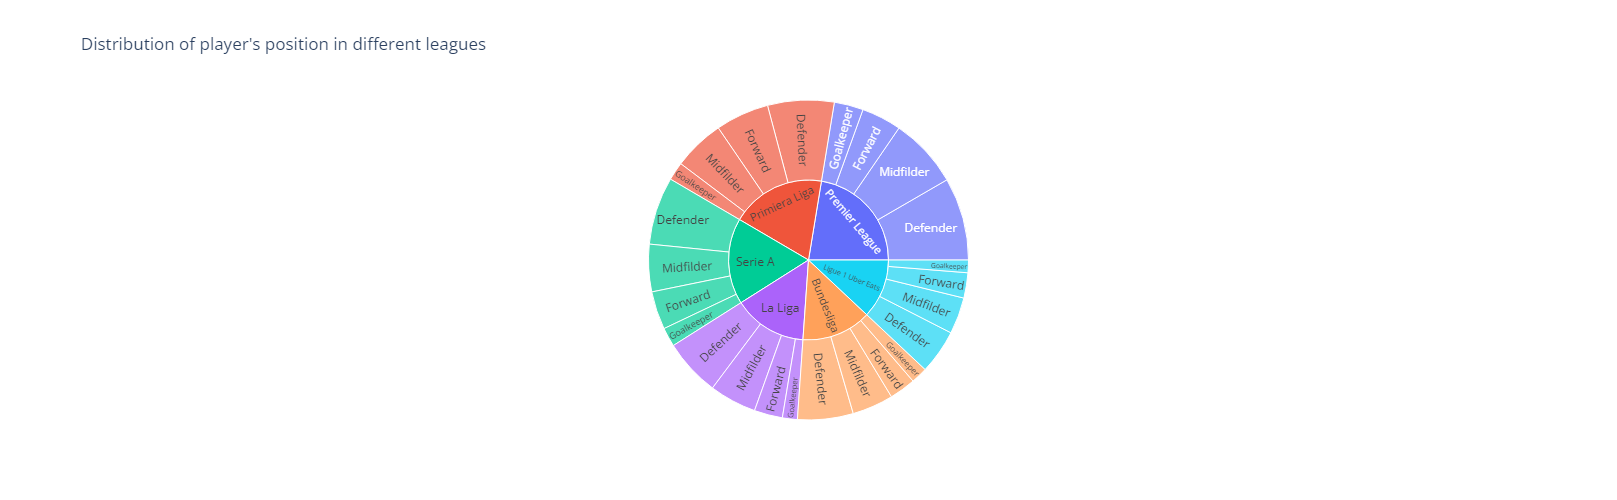

In [25]:
fig = px.sunburst(football_wage_data, path=["League", "Position"], height=500, title="Distribution of player's position in different leagues")
fig.show()

#### insights


1. **Premier League Dominance:** 

The sunburst chart vividly illustrates the commanding presence of the Premier League, with a notable abundance of players. Renowned as a powerhouse in world football, the English Premier League consistently attracts and accommodates a substantial number of players across various positions. This dominance aligns with its reputation as a highly competitive and widely watched league, reflecting the global appeal that draws talent from diverse footballing nations.


2. **Primeira Liga Presence:** 

The sunburst chart reveals the Primeira Liga from Portugal as the second-highest contributor to the player distribution. This highlights the league's significance as a hub for football talent, attracting players from diverse positions. The competitive nature of Primeira Liga and its role in nurturing emerging talents contribute to its position as a prominent player pool on the global football stage.


3. **La Liga and Serie A Significance:** 

Following closely are La Liga from Spain and Serie A from Italy, both standing out as major players in the distribution of football talent. These leagues, renowned for their storied histories and passionate fan bases, maintain a robust representation of players across various positions. The chart underscores their pivotal roles in shaping the international football landscape and emphasizes the global appeal that extends beyond their respective countries.


4. **Positional Consistency:**

The outer distribution of player positions within the sunburst chart echoes the consistent patterns observed in the overall analysis of player positions. Defenders prominently occupy a significant portion, reaffirming their numerical strength across leagues. Conversely, Goalkeepers maintain a comparatively modest presence, aligning with the specialized and limited nature of their role in a team.


In essence, the sunburst chart not only accentuates the league-wise distribution of players but also reinforces the broader trends in player positions observed in the earlier analysis.

### Plotting the Histogram showing the average age of players for different positions in all leagues

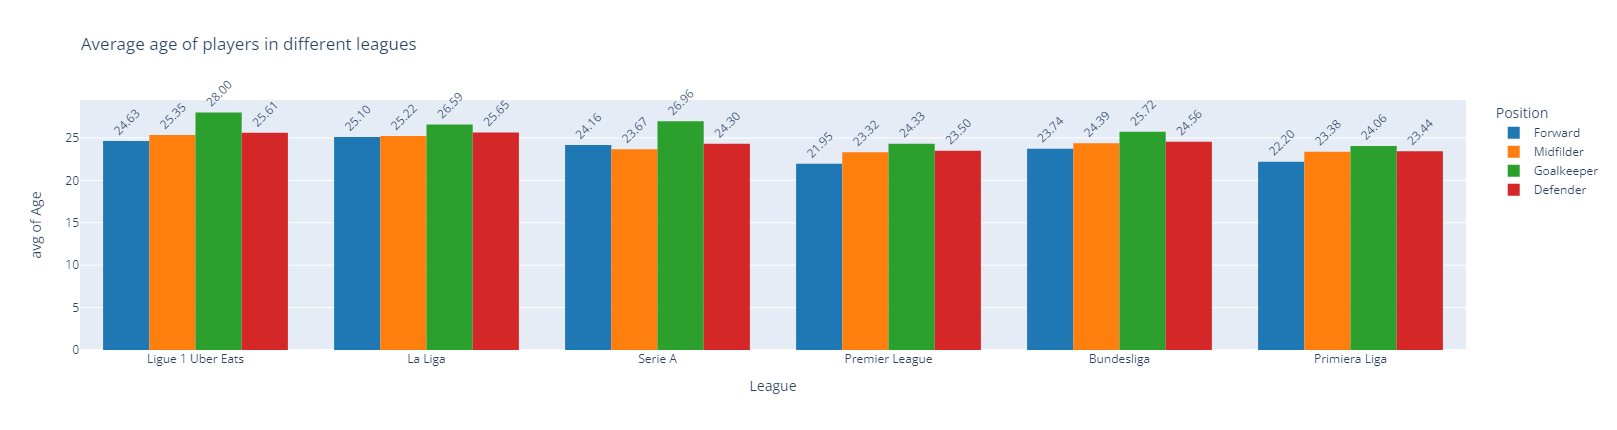

In [26]:
fig = px.histogram(
    football_wage_data, x="League", y="Age", barmode='group',
    histfunc='avg', text_auto=True, height=430, color="Position",
    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
    title="Average age of players in different leagues"
)
fig.update_traces(cliponaxis=False, textangle=-45, textposition="outside", texttemplate='%{y:.2f}')
fig.show()

#### Insights from Histogram: Average wage of players in different Leagues

1.  **Goalkeeper Longevity:** 

A notable trend reveals that the Goalkeeper position boasts the highest average age across various leagues. This phenomenon implies that Goalkeepers tend to have extended careers, potentially attributed to the relatively lower physical demands of their role. The nature of their position involves less intense physical activity compared to other positions, allowing Goalkeepers to maintain peak performance for an extended period, contributing to their prolonged presence in the game.
    
    
2.  **Youthful Dynamism in Forward Positions:** 

In contrast, the Forward position consistently exhibits the lowest average age across multiple leagues. This pattern underscores the importance of youthful energy and agility in players holding forward roles. The lower average age suggests that younger players are often favored for these positions due to their potentially superior physical condition and quicker reflexes. This preference for younger forwards may stem from the dynamic and physically demanding nature of offensive play, where peak physical attributes play a crucial role in achieving success on the field.

### Plotting the Histogram showing the Average Wage by position in different leagues

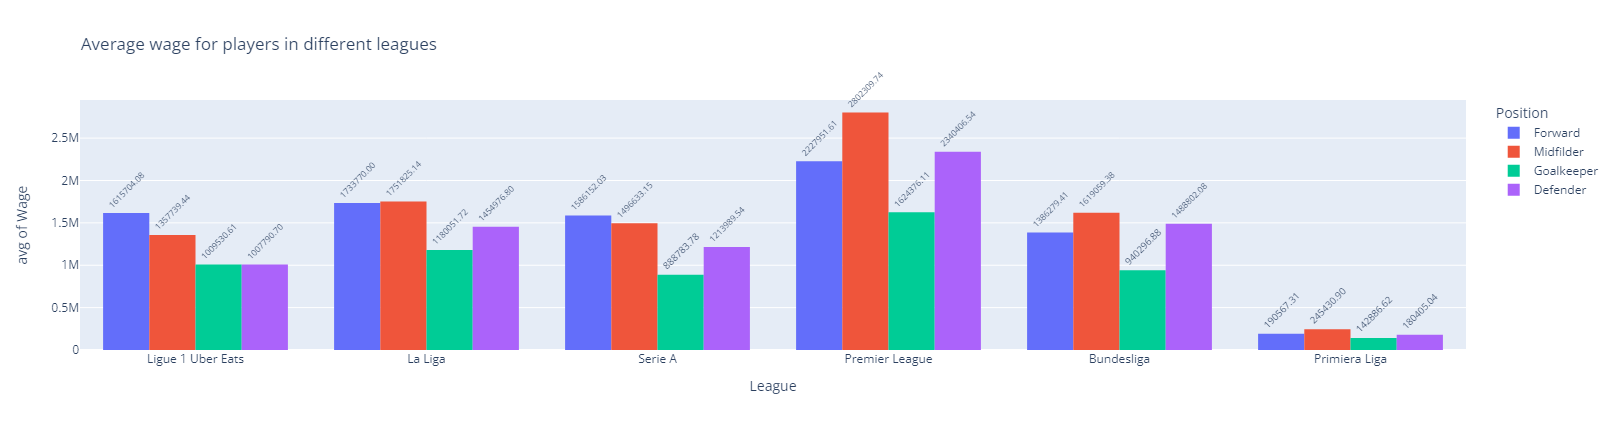

In [27]:
fig = px.histogram(
    football_wage_data, x="League", y="Wage", barmode='group', histfunc='avg', text_auto=True, height=430, color="Position",
    title="Average wage for players in different leagues"
)
fig.update_traces(cliponaxis=False, textangle=-45, textposition="outside", texttemplate='%{y:.2f}')
fig.show()

#### Insights from Histogram: Average Wage by position across Different Leagues

1. **Goalkeeper Compensation:** 

The histogram prominently reveals that Goalkeepers tend to have a lower average wage compared to players in other positions. This can be attributed to the specialized nature of the goalkeeper role and potentially a smaller sample size of goalkeepers in comparison to outfield players. Goalkeepers, despite their critical role, may receive comparatively lower wages due to the limited demand for their specific skill set.


2. **Forward and Midfielder Earnings Dominance:** 

Across all leagues, Forwards and Midfielders consistently occupy the top two positions in terms of average wages. This aligns with the understanding that these players often serve as the playmakers and goal-scorers, driving the game forward. The higher average wages for Forwards and Midfielders reflect the premium placed on offensive contributions and creative playmaking abilities, making them key assets for teams.


3. **Defensive Compensation:**

Defenders rank third in average wages across the histogram. While not commanding the same earning levels as Forwards and Midfielders, defenders are recognized for their crucial role in maintaining a team's defensive stability. Interestingly, the histogram suggests that defenders in the Premier League receive higher wages compared to their counterparts in other leagues. This disparity could be attributed to the renowned competitiveness and physical demands of the Premier League, where defensive prowess is highly valued.


4. **Premier League Defensive Premium:** 

The noteworthy observation of defenders in the Premier League earning more than those in other leagues emphasizes the unique dynamics of the English top-flight. The increased difficulty and intensity of the Premier League may contribute to the higher valuation of defensive skills, leading to elevated wages for defenders in this league.


In summary, the histogram provides valuable insights into the positional distribution of average wages across different leagues, reflecting the varying priorities and valuations placed on different player roles within the footballing landscape.

### Plotting the scatterplot showing the players Wage based on their Caps

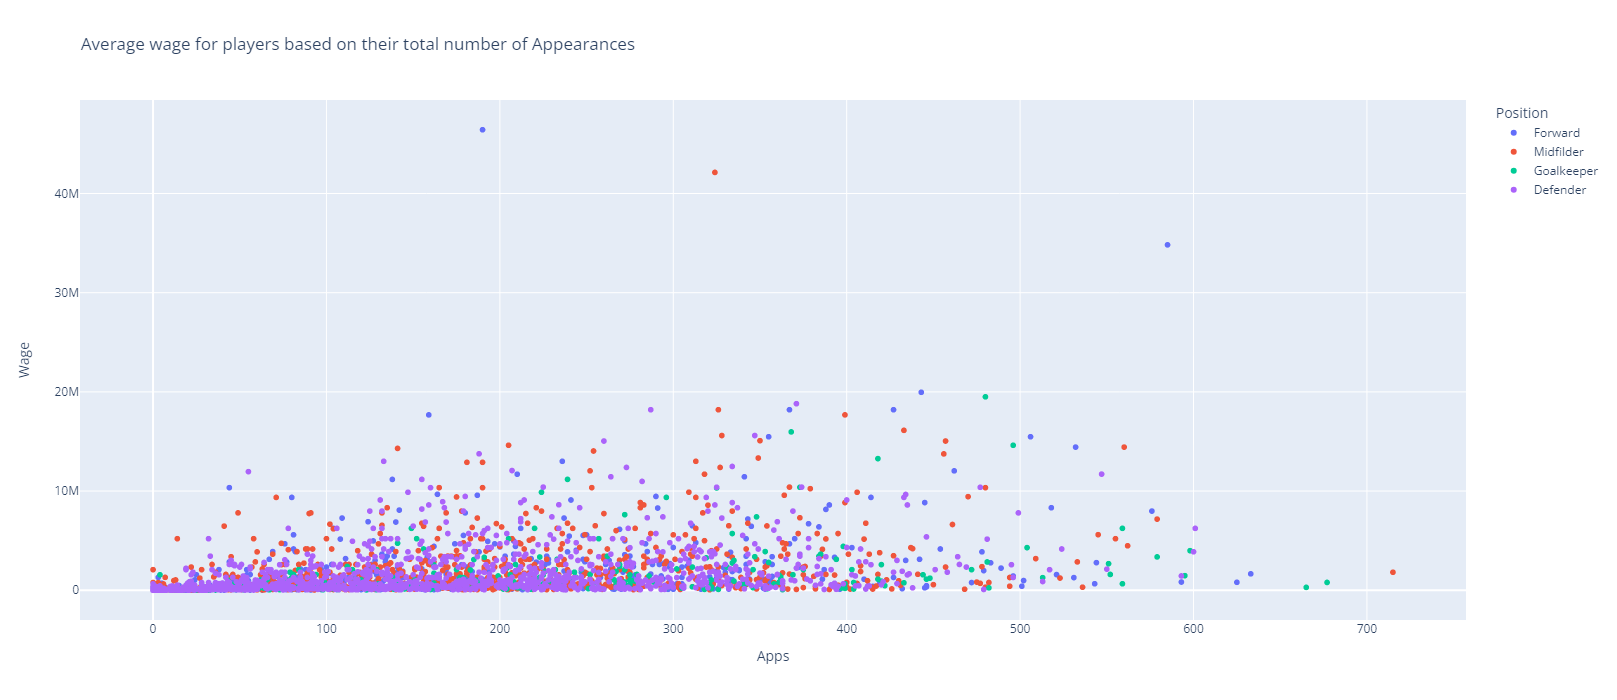

In [28]:
fig = px.scatter(
    football_wage_data, x="Apps", y="Wage", color="Position", height=700,
    title="Average wage for players based on their total number of Appearances"
)
fig.show()

### Plotting the Scatterplot showing the relationship between player's age and number of Appearances

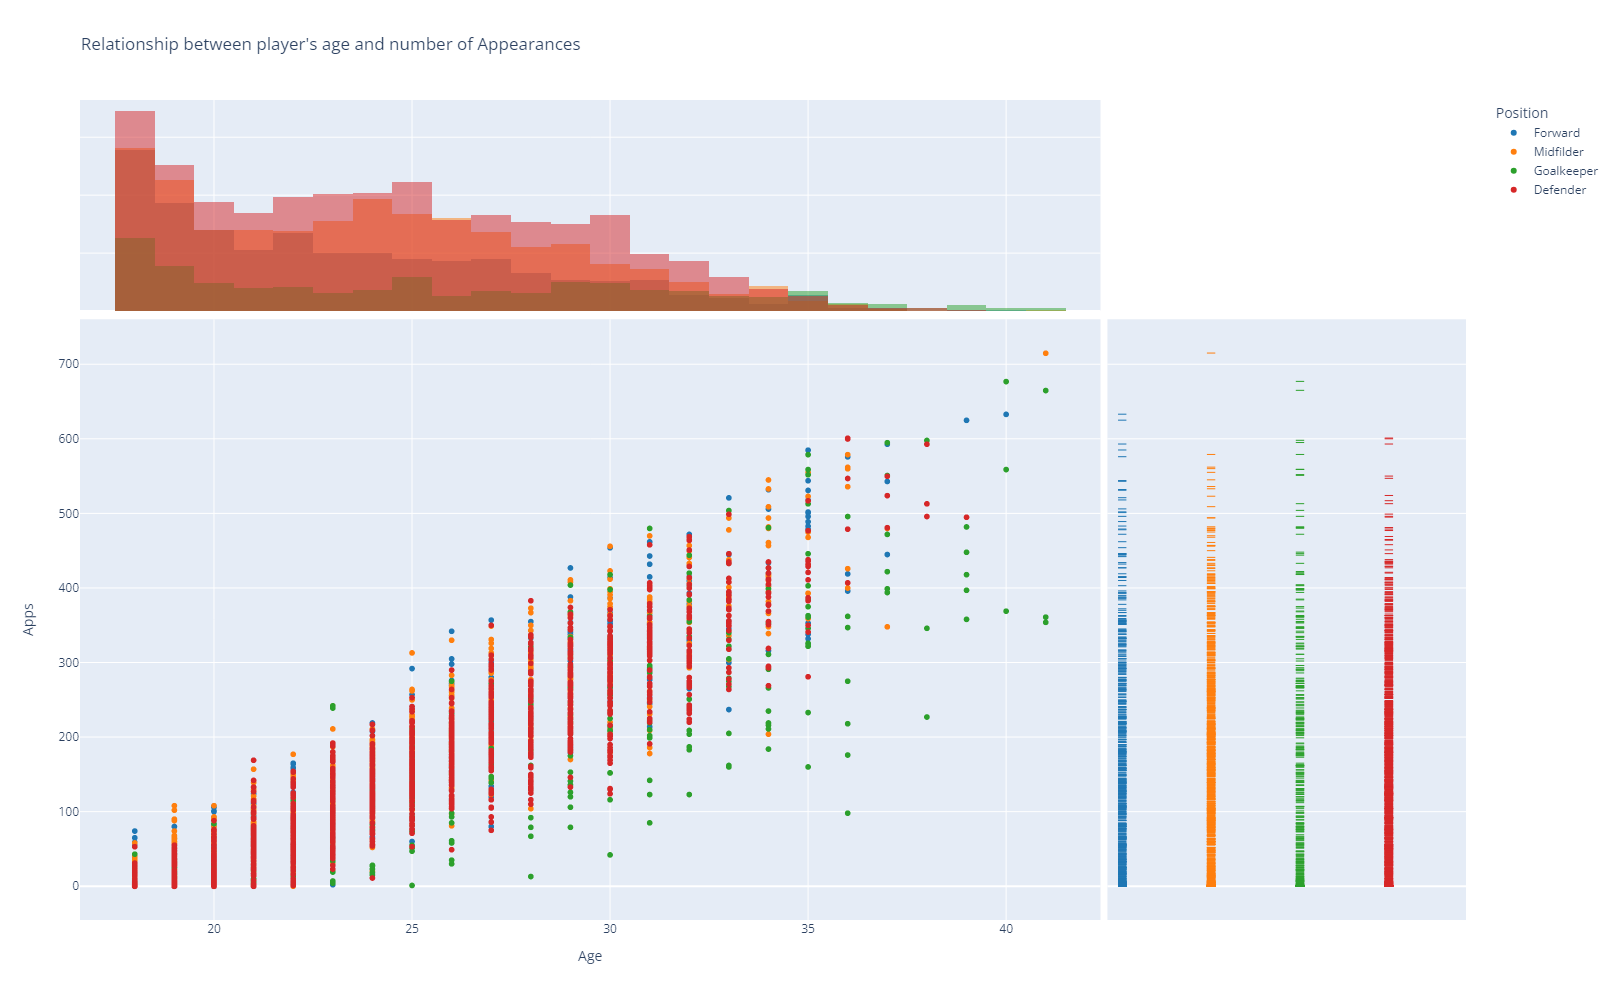

In [29]:
fig = px.scatter(
    football_wage_data, x="Age", y="Apps", height = 1000, color="Position",
    marginal_x="histogram", marginal_y="rug", color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
    title="Relationship between player's age and number of Appearances"
)
fig.show()

#### insights

1. **Goalkeeper Dynamics Across Ages:** 

The observed chart underscores a distinctive trend in the relationship between age and appearances, particularly notable for goalkeepers. In their younger years, goalkeepers tend to have fewer appearances compared to players in other positions. This can be attributed to the specialized and less physically demanding nature of their role, potentially affording them the ability to sustain a longer career. Interestingly, as goalkeepers age, their number of appearances tends to increase, showcasing the enduring effectiveness of experienced goalkeepers who rely on skill and experience more than sheer physical prowess.


2. **Defender Agility and Early Appearances:** 

The chart reveals a notable surge in appearances for defenders during their younger years. This pattern aligns with the positional demands placed on defenders, necessitating agility, speed, and physical strength. Teams often provide young defenders with more opportunities to gain experience and showcase their capabilities. This emphasis on early appearances for defenders reflects the importance of developing a robust defensive line with youthful energy and dynamism.



3. **Forwards and Midfielders: Parallel Trajectories:** 

For forwards and midfielders, the distribution of appearances showcases a relatively consistent pattern across age groups. Unlike goalkeepers and defenders, the number of appearances for forwards and midfielders tends to follow a more linear trajectory, without distinctive peaks or declines in specific age brackets. This suggests a consistent approach by teams in managing the playing time of players in these positions throughout their careers.


In summary, the relationship between player age and appearances is nuanced and position-dependent. While goalkeepers exhibit an interesting reversal in appearance patterns as they age, defenders showcase an emphasis on early appearances to harness their physical attributes. Forwards and midfielders, on the other hand, follow a more balanced and steady trajectory in terms of playing time throughout their careers.